In [ ]:
import numpy
import pandas
import matplotlib.pyplot as plt
import torch

#Supervised Learning Classification#

Method of creating a data model based on input ($x_i$) and output ($y_i$) pairs, in other words to define the relationshipt function between them. 

$ g : {(x_0, y_0), (x_1, y_1), ... , (x_n, y_n)}$

$ g : X \implies Y$

The function (g) is generally represented by the metric score of a matrix product.

$ f : X \times Y \implies \mathbb{R} $

Methematically the main objetive of the model is to determine the argument (k) that will maximize the relation of the function:

$g(x) = k f(x,y)$

##Descrete Domain##

In a descrete domain of the output Y the model produces a descrete set of categorical predictions where $y = f(x)$ is generally surjective (every output is associated with at least one input). 

If the function is bijective (every output is associeated with one different input) we say that the dataset is sparse, for a good generalization we need that:

$\exists X_{sk} \subset X : \forall x_i \in X_{s1} \implies y_{ck} = f(x_i)$

Where (c) represents a class where $ck \in C \land |C|<< n$. We can also determine that the dataset is balanced if:

$|y_i \in ck| \approx |y_i \in cj| \quad \forall (j,k) : j \ne k$

Inbalanced dataset
The model wrongly predicts the output will be in Class 2 region


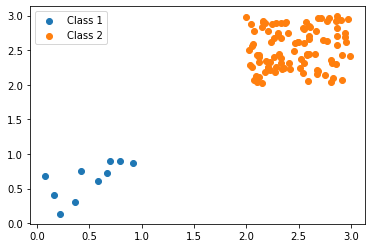

In [ ]:
print("Inbalanced dataset")
print("The model wrongly predicts the output will be in Class 2 region")
X1 = numpy.random.rand(10,2)
X2 = 2+numpy.random.rand(100,2)
X = numpy.concatenate((X1,X2))
Y1 = numpy.zeros(10)
Y2 = numpy.ones(100)
Y = numpy.concatenate((Y1,Y2))
plt.scatter(X[Y==0,0], X[Y==0,1], label = "Class 1")
plt.scatter(X[Y==1,0], X[Y==1,1], label = "Class 2")
plt.legend(loc="upper left")
plt.show()

Balanced but sparse, no Class 1 clusters
The model wrongly predicts the output will be in Class 1 region


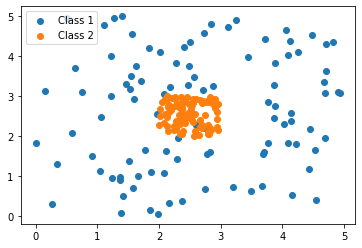

In [ ]:
print("Balanced but sparse, no Class 1 clusters")
print("The model wrongly predicts the output will be in Class 1 region")
X1 = 5*numpy.random.rand(100,2)
X2 = 2+numpy.random.rand(100,2)
X = numpy.concatenate((X1,X2))
Y1 = numpy.zeros(100)
Y2 = numpy.ones(100)
Y = numpy.concatenate((Y1,Y2))
plt.scatter(X[Y==0,0], X[Y==0,1], label = "Class 1")
plt.scatter(X[Y==1,0], X[Y==1,1], label = "Class 2")
plt.legend(loc="upper left")
plt.show()

##Fisher's Iris and kNN## 


Dataset with 150 metrics of 4 measurements (length and width of sepal and petal) from 3 types of flowers.

**k-Nearest Neighbors**

Simple model that creates a supervised classification algorithm using the local space references, in other words it assumes new inputs correspond to the class with the highest number of similar inputs a $k$ radius distance away.

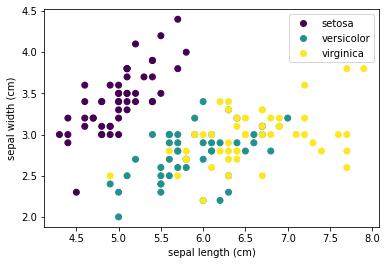

Dataset expected output
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

kNN model output with n=3
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

kNN model success rate or accuracy
0.96


In [ ]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
irisData = load_iris ()
X = irisData.data
Y = irisData.target
class_labels = irisData.target_names
norm = plt.Normalize(Y.min(), Y.max())
colorMap = plt.get_cmap('viridis')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='viridis', norm=norm)
handles = [plt.Line2D([0, 0], [0, 0], color=colorMap(norm(i)), marker='o', linestyle='', label=label)
           for i, label in enumerate(class_labels)]
plt.legend(handles=handles)
plt.xlabel(irisData.feature_names[0])
plt.ylabel(irisData.feature_names[1])
plt.show()

irisDataFrame = pandas.DataFrame(data= numpy.c_[irisData['data'], irisData['target']], columns= irisData['feature_names'] + ['target'])

print("Dataset expected output")
print(Y)
print()
print("kNN model output with n=3")
kNNModel = KNeighborsClassifier(n_neighbors =3)
kNNModel.fit(X, Y)
kNNModelPredictions = kNNModel.predict(X)
print(kNNModelPredictions)
print()
print("kNN model success rate or accuracy")
acc = 0
for (y, y_hat) in zip(Y, kNNModelPredictions):
    acc += (y == y_hat)
acc /= Y.size
print(acc)

##Cross Validation and kFold##



Process of randomly taking a subset of the input dataset ($X_S \subset X$) and then training the model with the subset to evaluate the model accuracy over that range. 

The objective is to iterate the process to obtain an average of the performance over any subset. 

**KFold Cross Validation**

The dataset will be divided into random size but equal parts and use every part except one to train using the last part to validate the training, the number of times this process iterates is determined by the k value.

In [ ]:
from sklearn . model_selection import KFold
irisData = load_iris ()
X = irisData.data
Y = irisData.target
print("KFold with 4 equal folds")
kFoldCrossValidation = KFold(n_splits = 4)
kFoldCrossValidation.get_n_splits(X)
print()
for (train_index, test_index) in kFoldCrossValidation.split(X):
    print ("Training Index Size:", train_index.size , "\n Testing Index Size:", test_index.size )
    X_train , X_test = X[ train_index ], X[test_index ]
    Y_train , Y_test = Y[ train_index ], Y[test_index ]
    kNNModel = KNeighborsClassifier(n_neighbors =3)
    kNNModel.fit(X_train, Y_train)
    Y_hat = kNNModel.predict(X_test)
    acc = numpy.sum(Y_hat == Y_test)/len(Y_hat)
    print("kNN accuracy (manual):  " + str(acc))
    print("kNN score (method):  " + str(kNNModel.score(X_test, Y_test)))
    print()

KFold with 4 equal folds

Training Index Size: 112 
 Testing Index Size: 38
kNN accuracy (manual):  1.0
kNN score (method):  1.0

Training Index Size: 112 
 Testing Index Size: 38
kNN accuracy (manual):  0.9210526315789473
kNN score (method):  0.9210526315789473

Training Index Size: 113 
 Testing Index Size: 37
kNN accuracy (manual):  0.918918918918919
kNN score (method):  0.918918918918919

Training Index Size: 113 
 Testing Index Size: 37
kNN accuracy (manual):  0.7027027027027027
kNN score (method):  0.7027027027027027



##Random Split##

**Random Split**

Technique used to split the dataset with the advantage of being able to control the fold sizes and randomizer seed. Note that smaller split sizes corresponde to higher accuracy while some random seeds will select good testing data.

Random Test Split with different Split Sizes
Test Subset sizes for a 30 Randomizer Seed: 
[0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75
 0.8  0.85]
kNN accuracy from different subset sizes: 
[1.0, 0.9565217391304348, 0.9354838709677419, 0.9210526315789473, 0.9347826086956522, 0.9245283018867925, 0.9344262295081968, 0.9411764705882353, 0.9473684210526315, 0.9397590361445783, 0.945054945054945, 0.9489795918367347, 0.9433962264150944, 0.9469026548672567, 0.9669421487603306, 0.875]
kNN accuracy average: 
0.9413359297804732


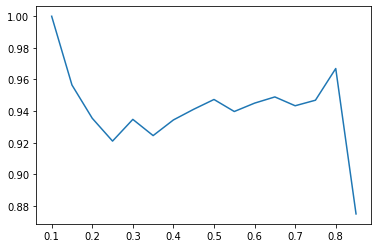


Random Test Split with different randomizer Seeds:
Randomizer seeds for a 20% Test Subset Size: 
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
kNN accuracy from random subsets of the same size: 
[1.0, 1.0, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333, 0.9, 0.9, 1.0, 0.9666666666666667, 0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 1.0, 0.9333333333333333, 0.9666666666666667, 1.0, 1.0]
kNN accuracy average: 
0.963157894736842


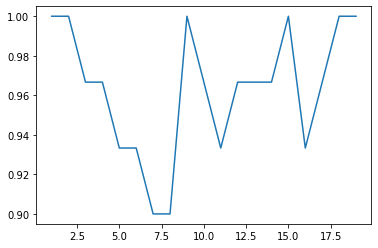

In [ ]:
from sklearn.model_selection import train_test_split
irisData = load_iris ()
X = irisData.data
Y = irisData.target
print("Random Test Split with different Split Sizes")
print("Test Subset sizes for a 30 Randomizer Seed: ")
# Range as START, STOP and STEP
testingSizes = numpy.arange(0.1, 0.9, 0.05)
randomizerSeed = 30
print(testingSizes)
modelAccuracy = []
for testSize in testingSizes:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=testSize, random_state=randomizerSeed)
    kNNModel = KNeighborsClassifier(n_neighbors = 3)
    kNNModel.fit(X_train, Y_train)
    acc = kNNModel.score(X_test, Y_test)
    modelAccuracy.append(acc)
print("kNN accuracy from different subset sizes: ")
print(modelAccuracy)
print("kNN accuracy average: ")
print(numpy.average(modelAccuracy))

plotX = testingSizes
plotY = modelAccuracy
plt.plot(plotX, plotY)
plt.show()

print()

print("Random Test Split with different randomizer Seeds:")
print("Randomizer seeds for a 20% Test Subset Size: ")
# Range as START, STOP and STEP
randomizerSeeds = numpy.arange(1, 20, 1)
testSize = 0.2
print(randomizerSeeds)
modelAccuracyTwo = []
for randomSeed in randomizerSeeds:
    X_train , X_test , Y_train , Y_test = train_test_split (X, Y, test_size=testSize, random_state=randomSeed)
    kNNModel = KNeighborsClassifier(n_neighbors = 3)
    kNNModel.fit(X_train, Y_train)
    acc = kNNModel.score(X_test, Y_test)
    modelAccuracyTwo.append(acc)
print("kNN accuracy from random subsets of the same size: ")
print(modelAccuracyTwo)
print("kNN accuracy average: ")
print(numpy.average(modelAccuracyTwo))

plotX = randomizerSeeds
plotY = modelAccuracyTwo
plt.plot(plotX, plotY)
plt.show()

##mAP and Manifold##

**Mean Average Presicion**

Model evaluation metric used for localization and classification models based on how far away the model is from the dataset and its initial parameters.

**Manifold**

Internal structure or region in space used by the machine learning algorithm to generate predictions. Classification algorithms in many ways are just finding the manifold or lower dimention geometric surface of the higher dimention dataset. Poor generalizations can occurr from:

1. Assuming the dataset distribution.
2. Assuming the dataset class balance.
3. Assuming the dataset has considerable variance.
4. Assuming the kernel properties.

In [ ]:
irisData = load_iris ()
X = irisData.data
Y = irisData.target
print("3 and 5 kNN Models used.")

Models = { 
  'kNN -3' : KNeighborsClassifier ( n_neighbors = 3 ),
  'kNN -5' : KNeighborsClassifier ( n_neighbors = 5 ) 
}

testSizes = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
print("Test Sizes: " + str(testSizes))
randomizerSeeds = [10, 42, 125, 999]
print("Randommizer Seeds: " + str(randomizerSeeds))
DF = pandas.DataFrame()

modelName = []
testSizeUsed=[]
randomizerSeedUsed=[]
modelAccuracyObtained = []

for name, model in Models.items():
    for randomSeed in randomizerSeeds:
        for testSize in testSizes:
            X_train , X_test , Y_train , Y_test = train_test_split (X, Y, test_size = testSize , random_state = randomSeed)
            model.fit(X_train,Y_train);
            Y_hat = model.predict(X_test)
            acc = numpy.sum(Y_hat == Y_test)/len(Y_hat)
            modelName.append(name)
            modelAccuracyObtained.append(acc);
            testSizeUsed.append(testSize)
            randomizerSeedUsed.append(randomSeed)

DF=DF.assign(**{"Model Name" : modelName})
DF=DF.assign(**{"Test Size" : testSizeUsed})
DF=DF.assign(**{"Random Seed" : randomizerSeedUsed})
DF=DF.assign(**{"Accuracy" : modelAccuracyObtained})

print("mAP of DataFrame for kNN 3, 5 and Total")
DFKNN3 = DF.loc[ (DF['Model Name'] == 'kNN -3') ]
print(DFKNN3["Accuracy"].mean())
DFKNN5 = DF.loc[ (DF['Model Name'] == 'kNN -5') ]
print(DFKNN5["Accuracy"].mean())
print(DF["Accuracy"].mean())

3 and 5 kNN Models used.
Test Sizes: [0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Randommizer Seeds: [10, 42, 125, 999]
mAP of DataFrame for kNN 3, 5 and Total
0.9566115520282187
0.9365531305114637
0.9465823412698414


In [ ]:
DFBestAcc = DF.nlargest(10,['Accuracy'])
DFBestAcc

,Model Name,Test Size,Random Seed,Accuracy
6,kNN -3,0.4,42,0.983333
30,kNN -5,0.4,42,0.983333
20,kNN -3,0.6,999,0.977778
10,kNN -3,0.8,42,0.975000
7,kNN -3,0.5,42,0.973333
19,kNN -3,0.5,999,0.973333
9,kNN -3,0.7,42,0.971429
33,kNN -5,0.7,42,0.971429
4,kNN -3,0.8,10,0.966667
12,kNN -3,0.4,125,0.966667


##Least Squares or LS##

**Least Squares**

Algorithm used with tagged datasets, it's based on the differences between the obtained prediction and the expected output. It is the principle behind the Perceptron Model were we approximate the predictions by trying to lower the error, in other words it is a **linear regression** method for fitting a line to the dataset.

$Y = X^\top W + B$

$\hat{y} = x^\top W + B$

$\epsilon = \hat{y} - y$

Here the error is called a **loss**, the loss must be distributed along every prediction weight of the model to minimize its effects on each  individual prediction, therefore with each prediction we update the model in an iterative process called **gradiant descent**.

$\delta_W (\epsilon) = W$

$W = W - \eta \cdot \epsilon$

Eta is the learning rate or how the size of our next update to the model, if it is too big we might overshoot and skip the lowerst error function, if it is too small it will take more time before it converges.

<function matplotlib.pyplot.show>

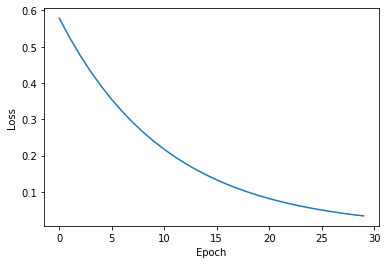

In [ ]:
eta = 0.001
dimension = 2;
# 100 two-data inputs assigned to 100 outputs
X = numpy.random.rand(100,dimension)
Y = numpy.random.rand(100,1)
epochs = 30
# Random Starting input
W = numpy.random.rand(dimension, 1)
B = 1 - numpy.random.rand(1 ,1)
Loss = []
for epoch in range( epochs ):
    loss = 0
    for (x,y) in zip(X,Y):
        y_hat = numpy.matmul(x, W)+B
        e = y_hat - y
        W = W - eta * e
        loss = loss + e
    loss /= len(X);
    Loss.append(loss[0][0])

plt.plot(Loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show

##ANN##

**Artificial Neural Network**

Mathematical model based on matrix products that creates weighted associations between input and output pairs in a descrete or continuous set.

1. Regresion models solve continuous sets.
2. Classification models solve discrete sets.

In general it is a function of the form:

$f(x) = f_{n}( f_{n-1} ( \ldots f_1( x^{\top} W_1   ) \ldots W_{n-1} )  W_{n} )$

Where $f( \cdot )$ is the activation function and $f_k(W_k) ; k \neq 1$ are the hiden layers of the model. In this canonical form we assume that (f) is differentiable.

The ANN calculates its response based on a matrix multiplication between the input (x) and the weight (W), with multiple layers it becomes a recursive process $W^l$ for any given layer (l). The learning bias is an additional constan (b) that prevents underflow and stabilices the recursive process.

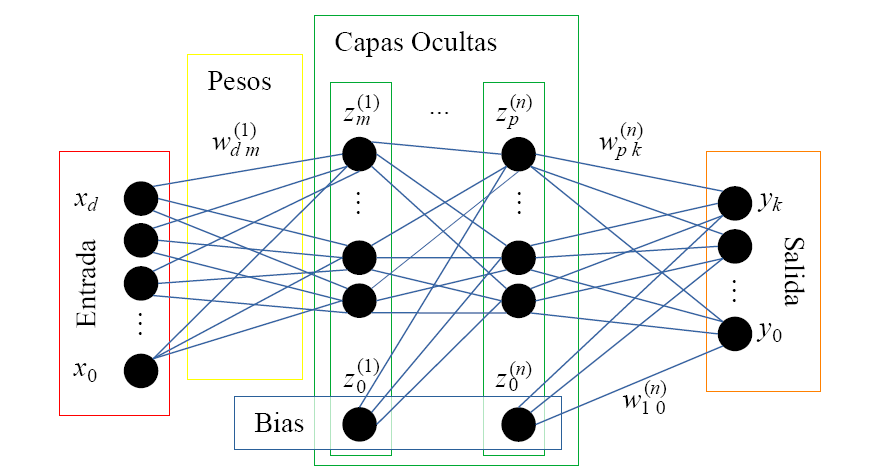

**Activation Function**

The purpose of this function is to control the output range and reducing the probability that the ANN will output extreme predictions. The weight function for each input can be simplified as:

$y=wx + b$

Here the activation function would simply be (f) as a range limiter of (y):

$y = f(wx + b)$

It is common for most [activation functions](https://towardsdatascience.com/7-popular-activation-functions-you-should-know-in-deep-learning-and-how-to-use-them-with-keras-and-27b4d838dfe6) to limit the output range to be between 0 and 1 for example:

* Sigmoid: $f(x) = 1/(1+e^{-x})$. Here the limiting range goes from 0 to 1.
* Tanh: $\tanh(x) = 2/(1+e^{(-2x)}) -1$. Here the limiting range goes from -1 to 1.

In [ ]:
# Download Iris Training Data and Testing Data
!gdown https://drive.google.com/uc?id=1OXto3c5ufnfyoFKqTW1Bh2gY9Vi6uU0T
!gdown https://drive.google.com/uc?id=1Zkvs0-4BtLYLRIy_1CZ1cfdrG_taTF9h

Downloading...
From: https://drive.google.com/uc?id=1OXto3c5ufnfyoFKqTW1Bh2gY9Vi6uU0T
To: /content/iris_train.csv
100% 3.60k/3.60k [00:00<00:00, 5.07MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Zkvs0-4BtLYLRIy_1CZ1cfdrG_taTF9h
To: /content/iris_test.csv
100% 929/929 [00:00<00:00, 1.54MB/s]


Epoch [1/500] Loss: 1.1672
Epoch [51/500] Loss: 1.0816
Epoch [101/500] Loss: 1.0584
Epoch [151/500] Loss: 1.0312
Epoch [201/500] Loss: 0.9980
Epoch [251/500] Loss: 0.9574
Epoch [301/500] Loss: 0.9086
Epoch [351/500] Loss: 0.8516
Epoch [401/500] Loss: 0.7876
Epoch [451/500] Loss: 0.7197

mAp = 0.86667 



<function matplotlib.pyplot.show>

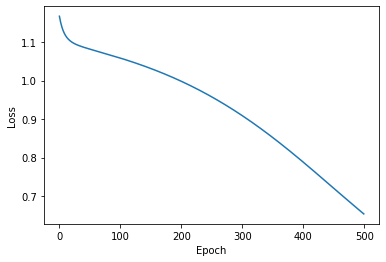

In [ ]:
# TRAINING

dataTraining = pandas.read_csv('iris_train.csv')
# Convert target datapoints strings into numbers
dataTraining.loc[ dataTraining['species'] == 'Iris-setosa', 'species'] = 0
dataTraining.loc[ dataTraining['species'] == 'Iris-versicolor', 'species'] = 1
dataTraining.loc[ dataTraining['species'] == 'Iris-virginica', 'species'] = 2
# Convert target datapoints into floating numbers
dataTraining = dataTraining.apply(pandas.to_numeric)
# Remove the header and index from the dataframe
dataTrainingArray = dataTraining.values
# Store the training inputs and training outputs
x_Training = dataTrainingArray[:, :4]
y_Training = dataTrainingArray[:, 4]

# Random Training Matrix Seed
torch.manual_seed(1234)
hiddenLayer1 = 7
hiddenLayer2 = 10
learningRate = 0.01
numberOfEphocs = 500

# Neural Network
class myNeuralNetwork (torch.nn.Module):
    def __init__(self):
        super(myNeuralNetwork, self).__init__()
        self.fc0 = torch.nn.Linear(4, hiddenLayer1)
        self.fc1 = torch.nn.Linear(hiddenLayer1, hiddenLayer2)
        self.fc2 = torch.nn.Linear(hiddenLayer2, 3)

    # Next Activation Function Step
    def forward(self, x):
        x = torch.nn.functional.logsigmoid( self.fc0(x) )
        x = torch.nn.functional.logsigmoid( self.fc1(x) )
        x = self.fc2(x)
        return x

neuralNetworkInstance = myNeuralNetwork()

# Cost Function or Criterion
criterionFunction = torch.nn.CrossEntropyLoss()
# Gradient Descent Algorithm
optimizerFunction = torch.optim.SGD(neuralNetworkInstance.parameters(), lr = learningRate)

Loss = []
for epoch in range(numberOfEphocs):
    X = torch.autograd.Variable (torch.Tensor(x_Training).float() )
    Y = torch.autograd.Variable (torch.Tensor(y_Training).long() )
    # Starting point of the gradient
    optimizerFunction.zero_grad()
    # Forward step of the gradient
    Y_hat = neuralNetworkInstance(X)
    # Error or Loss Calculation
    loss = criterionFunction(Y_hat, Y)
    Loss.append(loss.detach().numpy())
    # Backpropagation of the Error
    loss.backward()
    # Update the gradient path
    optimizerFunction.step()
    # Print the loss function
    if (epoch) % 50 == 0:
        print ('Epoch [%d/%d] Loss: %.4f' 
                   %(epoch+1, numberOfEphocs, loss.data))
    


# TESTING

dataTesting = pandas.read_csv('iris_test.csv')
# Convert target datapoints strings into floating numbers
dataTesting.loc[ dataTesting['species'] == 'Iris-setosa', 'species'] = 0
dataTesting.loc[ dataTesting['species'] == 'Iris-versicolor', 'species'] = 1
dataTesting.loc[ dataTesting['species'] == 'Iris-virginica', 'species'] = 2
dataTesting = dataTesting.apply(pandas.to_numeric)
dataTestingArray = dataTesting.values;
x_Testing = dataTestingArray[:, :4]
y_Testing = dataTestingArray[:, 4]
# Update
X = torch.autograd.Variable (torch.Tensor(x_Testing).float())
Y = torch.Tensor(y_Testing).long()
Y_hat = neuralNetworkInstance(X)
predictionExactValues, classPredictions = torch.max(Y_hat.data, 1)
print()
# Model Precision Using mean Average precision
print('mAp = %0.5f ' % (torch.sum( Y==classPredictions ) / len(x_Testing)) )
print()

plt.plot(Loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show